In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from scipy.spatial.distance import cdist
import os
import warnings

In [10]:
# Function to load datasets
def load_datasets():
    noisy_circles, _ = make_circles(n_samples=1500, factor=.5, noise=.05)
    noisy_moons, _ = make_moons(n_samples=1500, noise=.05)
    blobs, _ = make_blobs(n_samples=1500, centers=3, cluster_std=1.0)
    random_state = 42
    X, _ = make_blobs(n_samples=1500, random_state=random_state)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    aniso = np.dot(X, transformation)
    no_structure = np.random.rand(1500, 2)

    return [
        (noisy_circles, 2, 'Noisy Circles'),
        (noisy_moons, 2, 'Noisy Moons'),
        (blobs, 3, 'Blobs'),
        (aniso, 3, 'Anisotropic Blobs'),
        (no_structure, 3, 'No Structure')
    ]

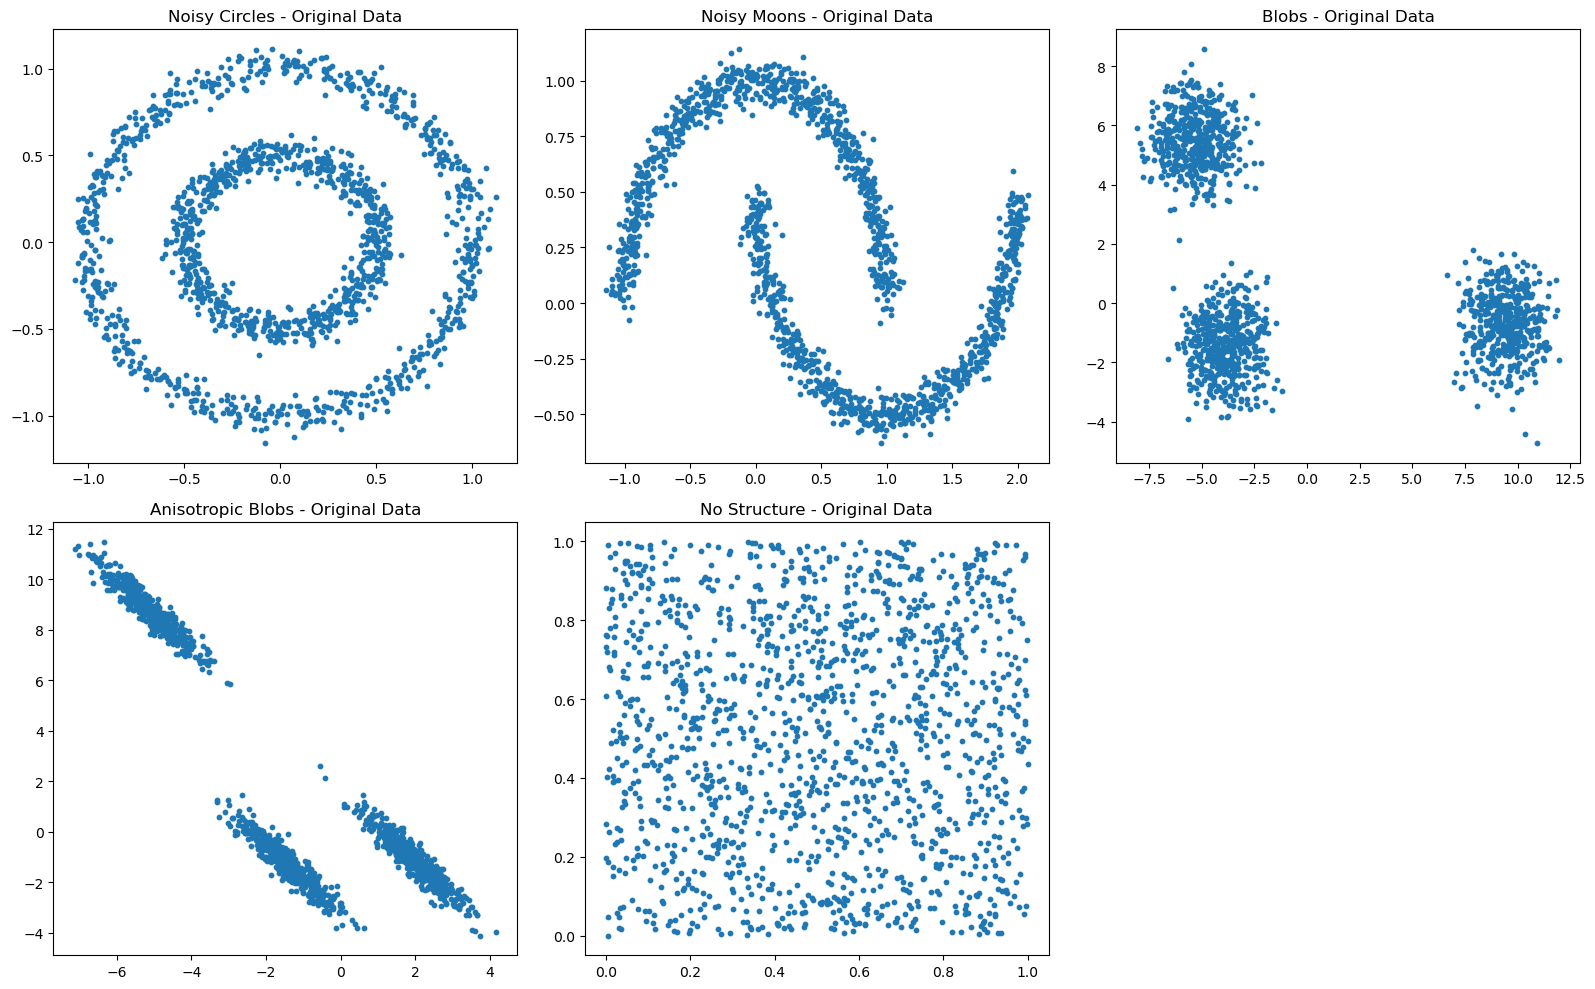

In [11]:
# Load datasets
datasets = load_datasets()
plt.figure(figsize=(16, 10))
# Visualize datasets
for i, (data, _, title) in enumerate(datasets):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[:, 0], data[:, 1], s=10)
    plt.title(title + " - Original Data")
plt.tight_layout()
plt.show()

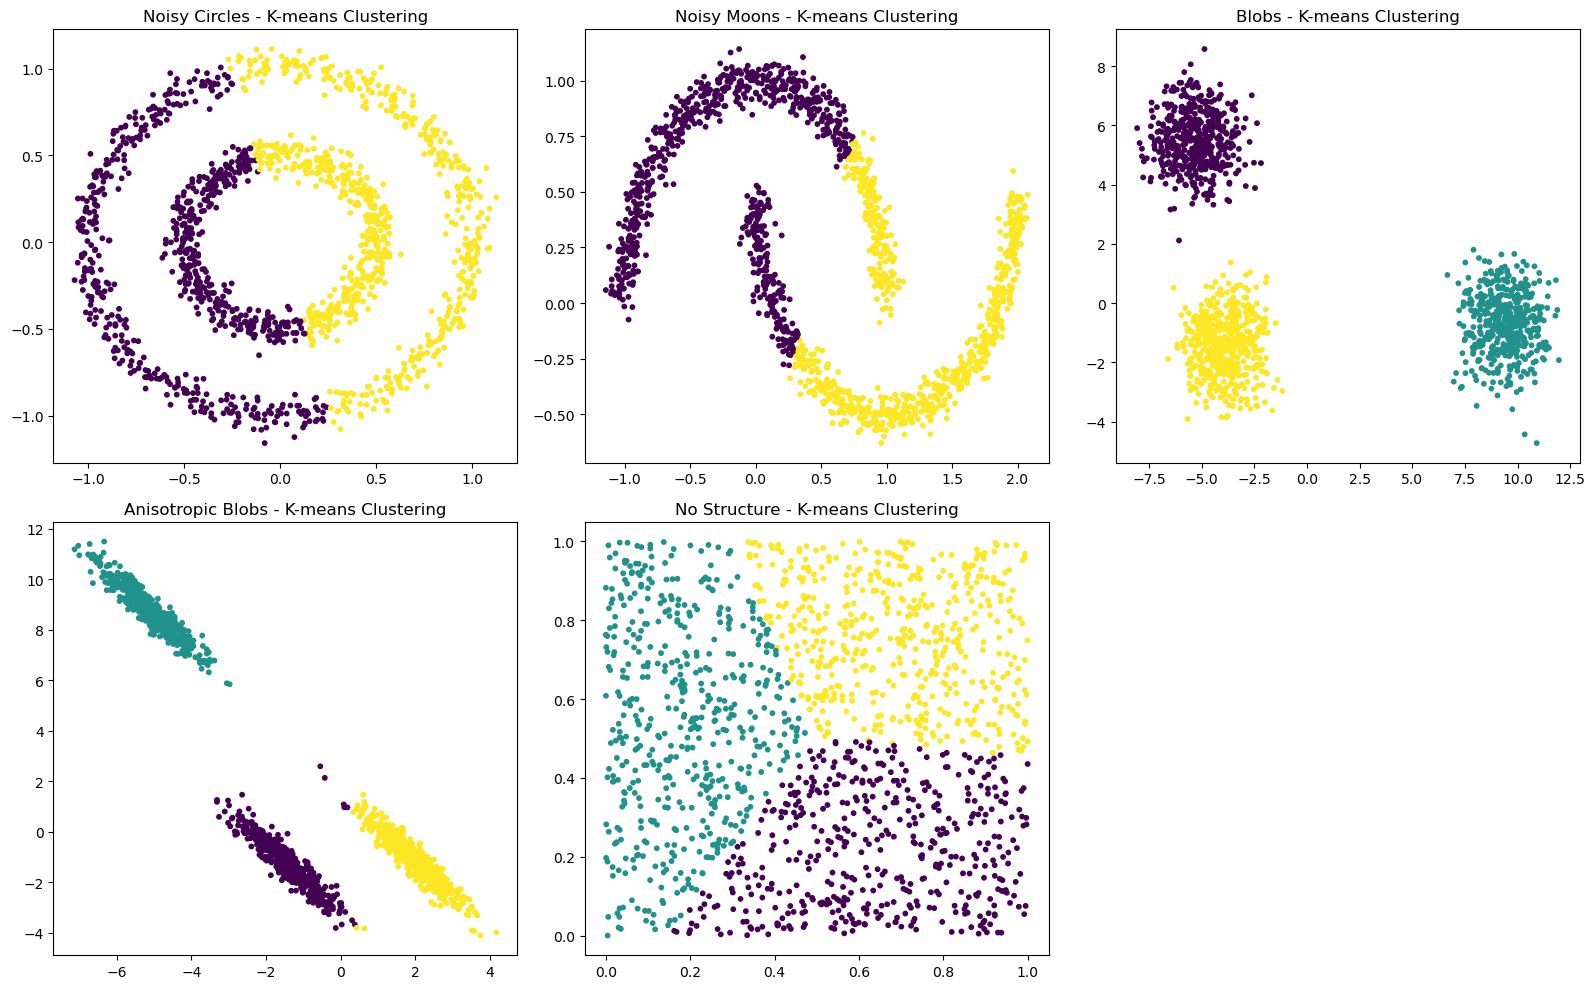

Silhouette to each dataset is: [0.352, 0.4897, 0.7873, 0.7013, 0.3809]


In [31]:
# Set the environment variable OMP_NUM_THREADS to 1
os.environ['OMP_NUM_THREADS'] = '1'
# Disable warning messages
warnings.filterwarnings('ignore')

Silhouette_list = []
plt.figure(figsize=(16, 10))
#  Apply K-means clustering and visualize results
for i, (data, n_clusters, title) in enumerate(datasets):
    plt.subplot(2, 3, i + 1)

    # Applt K-means to the datasets
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(data)

    # Compute Silhouette to each dataset after procession
    Silhouette = metrics.silhouette_score(data, kmeans_labels)
    Silhouette_list.append(round(Silhouette,4))
    
    # Visualize each dataset after procession
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
    plt.title(title + " - K-means Clustering")
plt.tight_layout()
plt.show()
print(f'Silhouette to each dataset is: {Silhouette_list}')

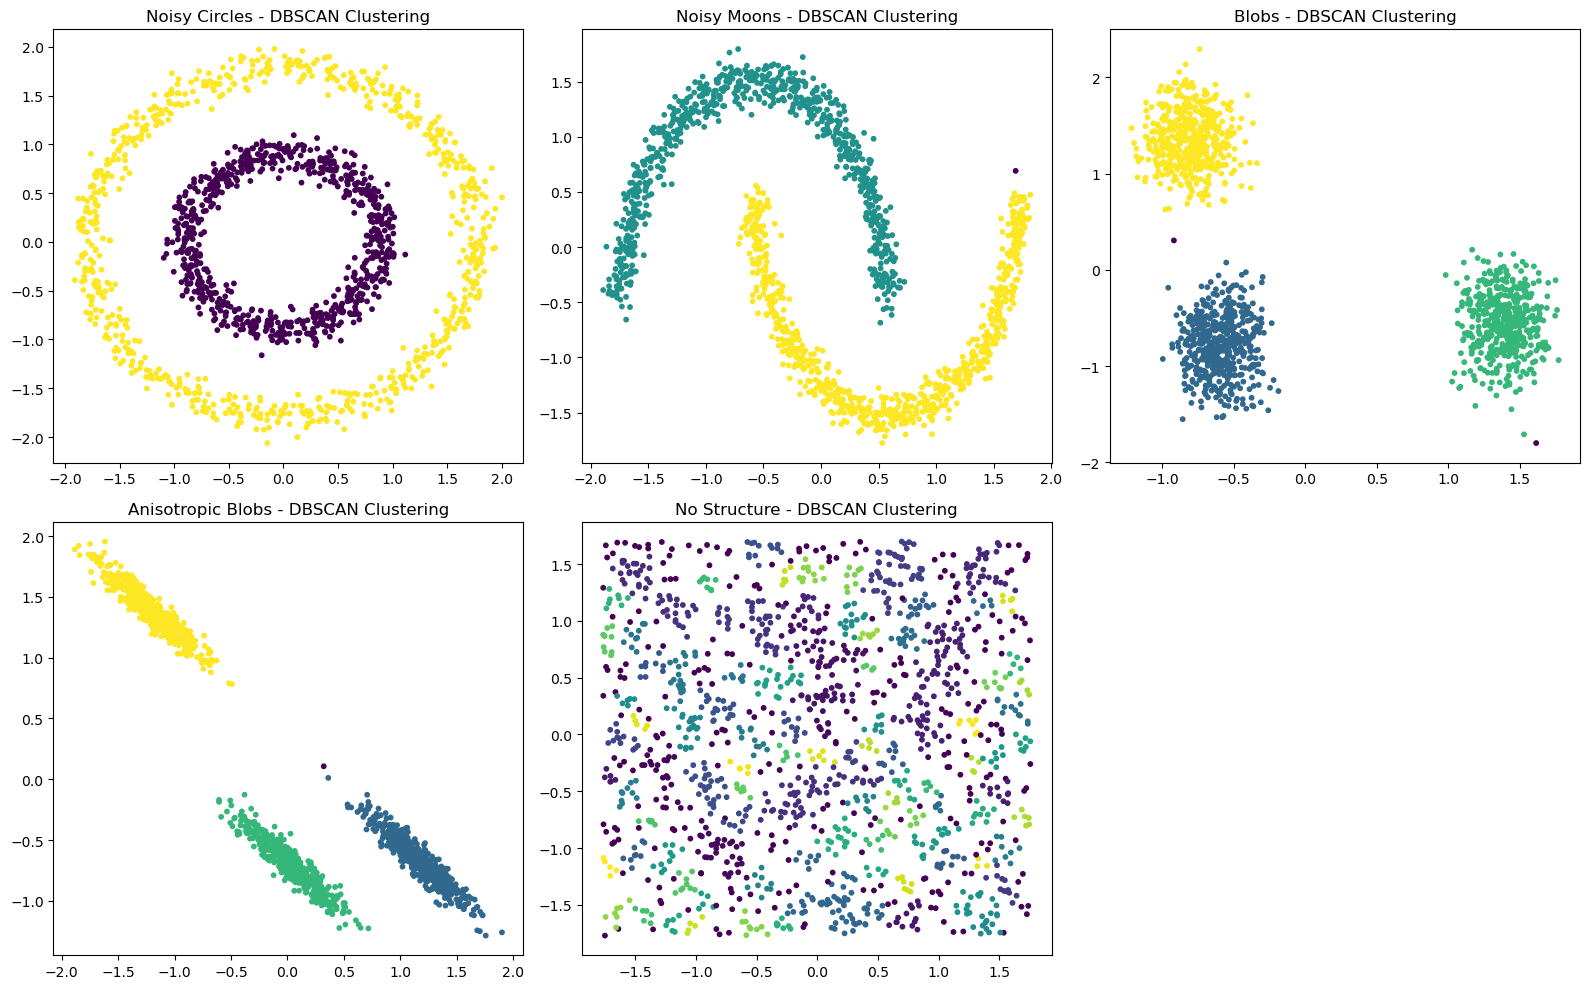

Silhouette to each dataset is: [0.1138, 0.2538, 0.7809, 0.6821, 0.1034]


In [32]:
plt.figure(figsize=(16, 10))
Silhouette_list = []
# Apply DBSCAN clustering and visualize results
for i, (data, _, title) in enumerate(datasets):
    # Standardize features for DBSCAN
    data = StandardScaler().fit_transform(data)

    if title == 'Noisy Circles':
        eps = 0.2
    elif title == 'Noisy Moons':
        eps = 0.2
    elif title == 'Blobs':
        eps = 0.3
    elif title == 'Anisotropic Blobs':
        eps = 0.3
    else:
        eps = 0.1
    
    # Applt DBScan to the datasets
    dbscan = DBSCAN(eps=eps)
    dbscan_labels = dbscan.fit_predict(data)

    # Compute Silhouette to each dataset after procession
    Silhouette = metrics.silhouette_score(data, dbscan_labels)
    Silhouette_list.append(round(Silhouette,4))
    
    # Visualize each dataset after procession
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='viridis', s=10)
    plt.title(title + " - DBSCAN Clustering")
plt.tight_layout()
plt.show()
print(f'Silhouette to each dataset is: {Silhouette_list}')

In [14]:
# Define a function to perform K-means clustering and record the change in centroids
def kmeans_with_centroids(X, n_clusters, max_iter=100):
    np.random.seed(seed=42)
    centroids = np.random.normal(loc=0.0, scale=1., size=(n_clusters, X.shape[1]))
    cent_history = [centroids.copy()]

    for i in range(max_iter):
        distances = cdist(X, centroids)
        labels = distances.argmin(axis=1)
        
        new_centroids = np.array([np.mean(X[labels == j], axis=0) for j in range(n_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids.copy()
        cent_history.append(centroids)

    return labels, cent_history

# Define a function to perform K-means clustering and record the change in centroids
def plot_kmeans_results(X, labels, centroids_history):
    plt.figure(figsize=(25, 16))
    for i, cent in enumerate(centroids_history):
        plt.subplot(5, 5, i + 1)
        plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo')
        plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co')
        plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo')
        plt.plot(cent[:, 0], cent[:, 1], 'rX', markersize=12)
        plt.title('Step {}'.format(i + 1))
    plt.tight_layout()
    plt.show()

# Function to reduce dimensions of the data using either PCA or t-SNE
def reduce_dimensions(data, method, n_components):
    if method == 'PCA':
        # Use PCA for dimensionality reduction
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data)
    elif method == 't-SNE':
        # Use t-SNE for dimensionality reduction
        tsne = TSNE(n_components=n_components)
        reduced_data = tsne.fit_transform(data)
    else:
        raise ValueError("Method not supported")
    return reduced_data

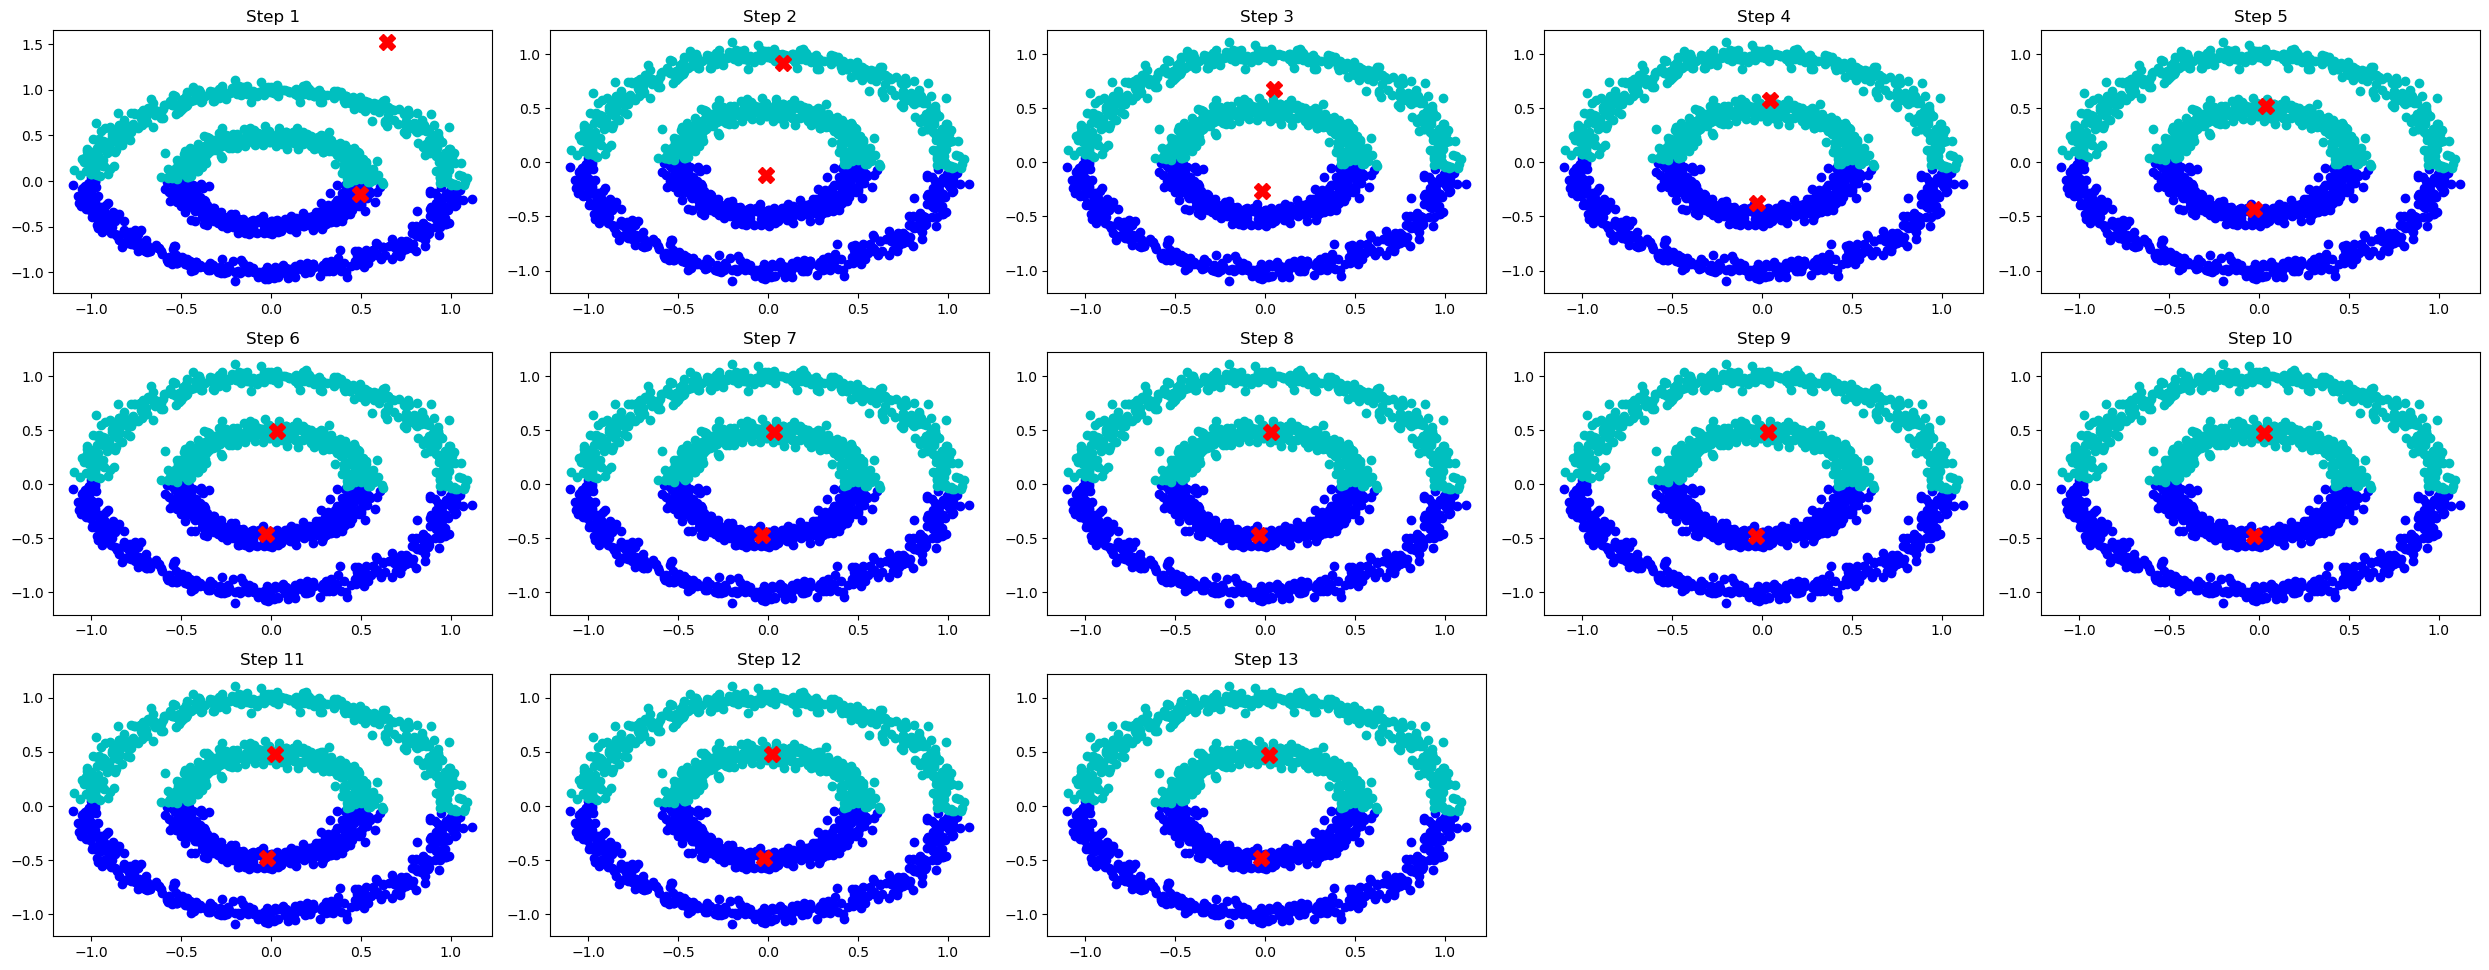

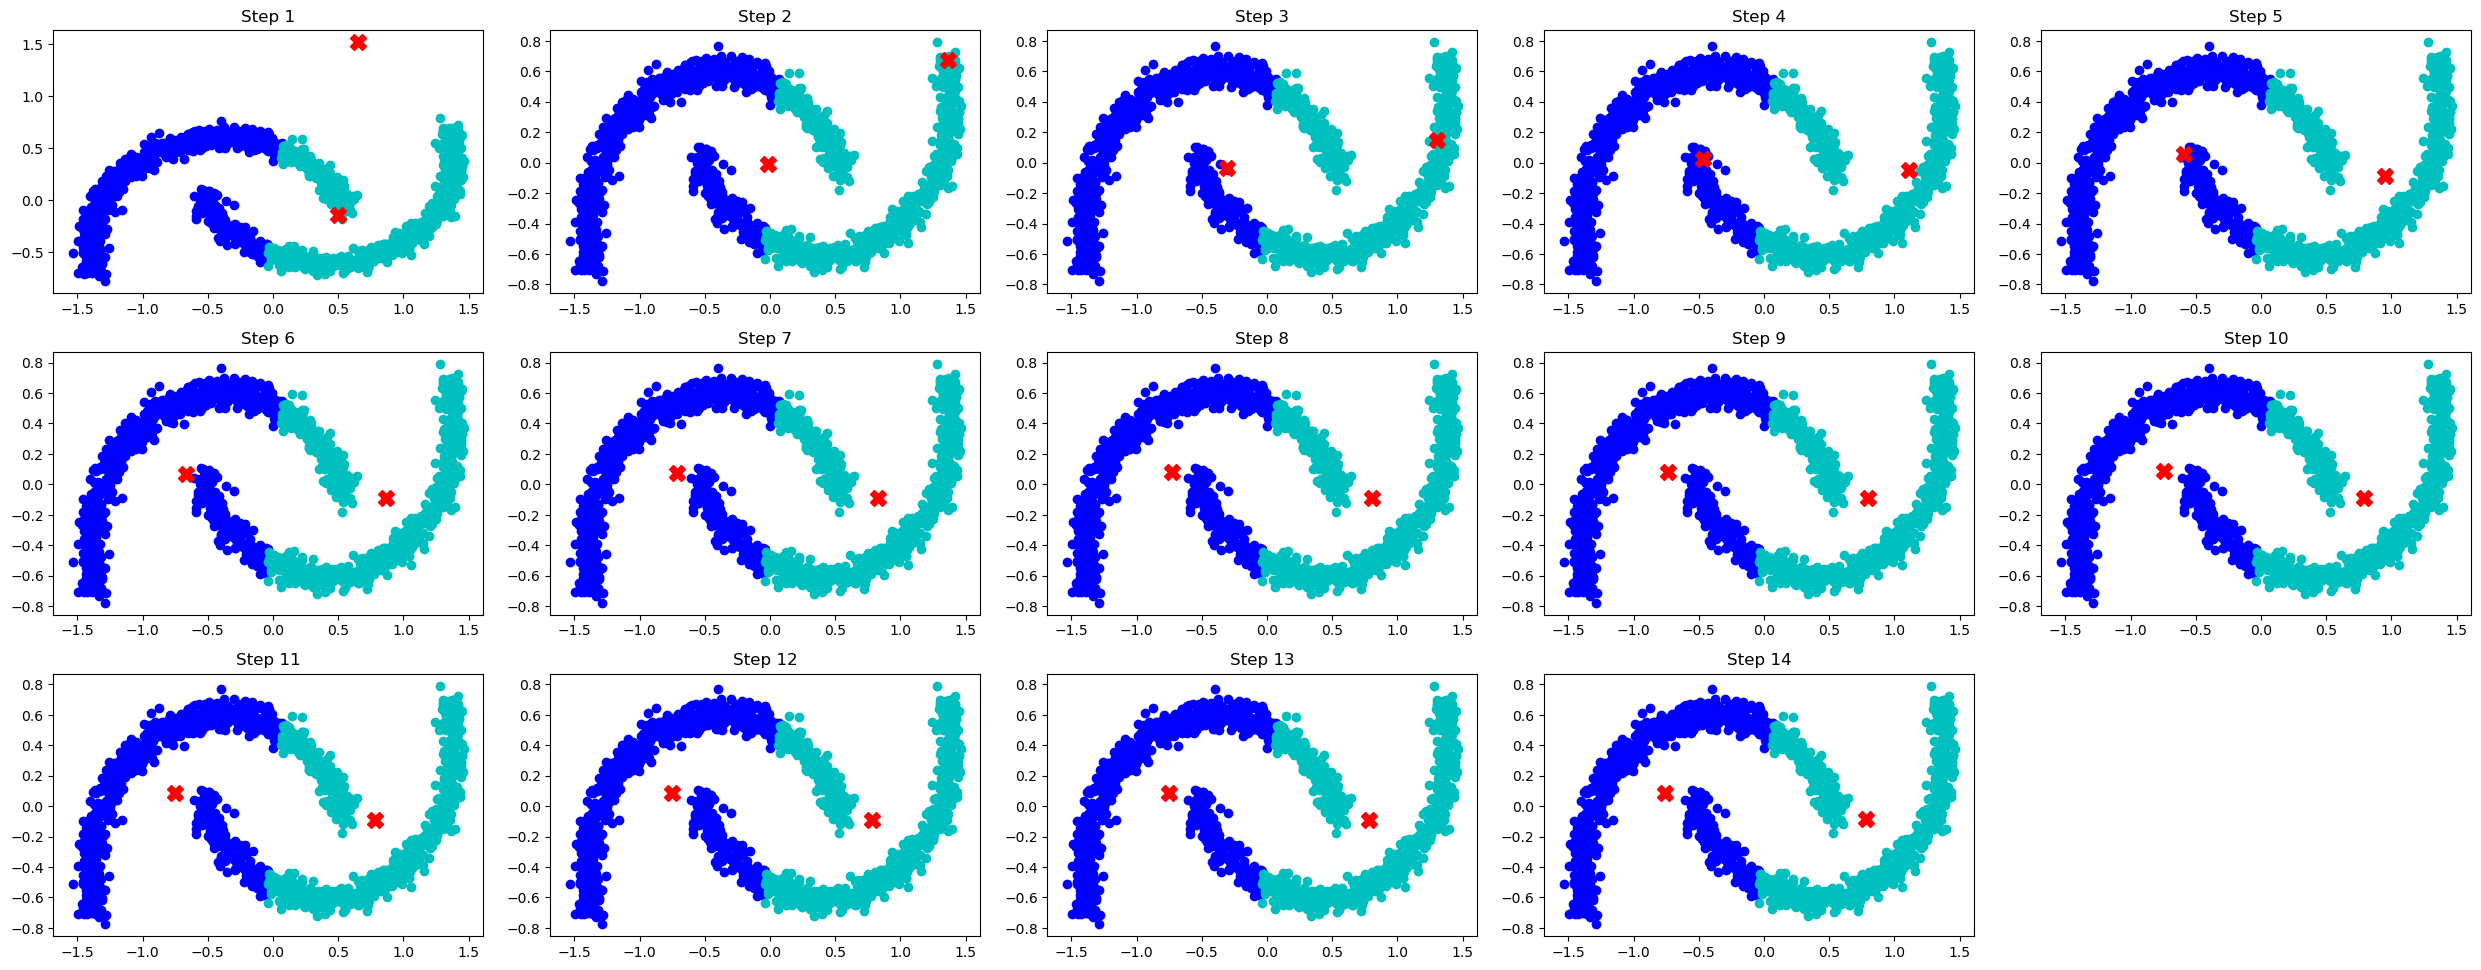

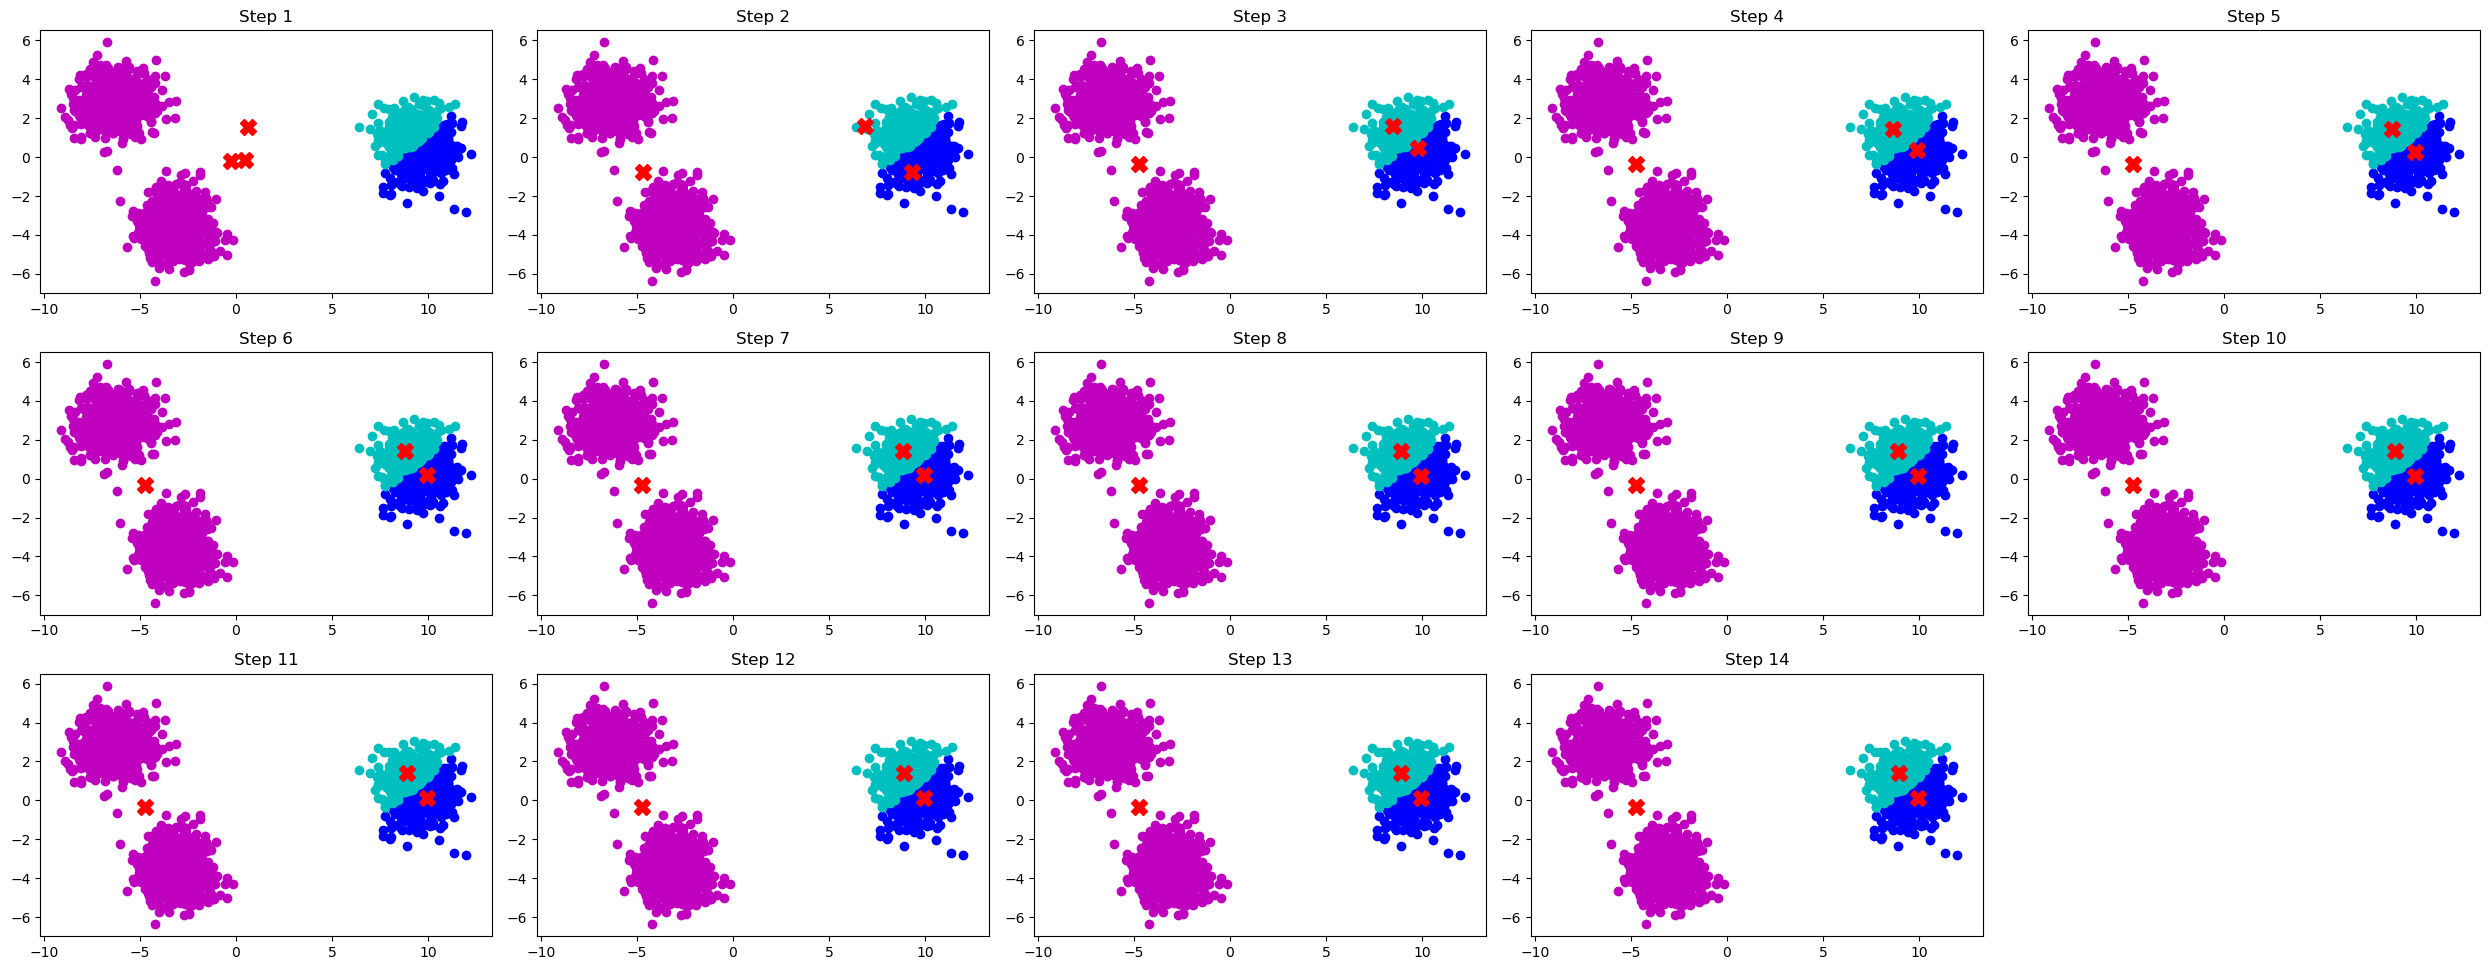

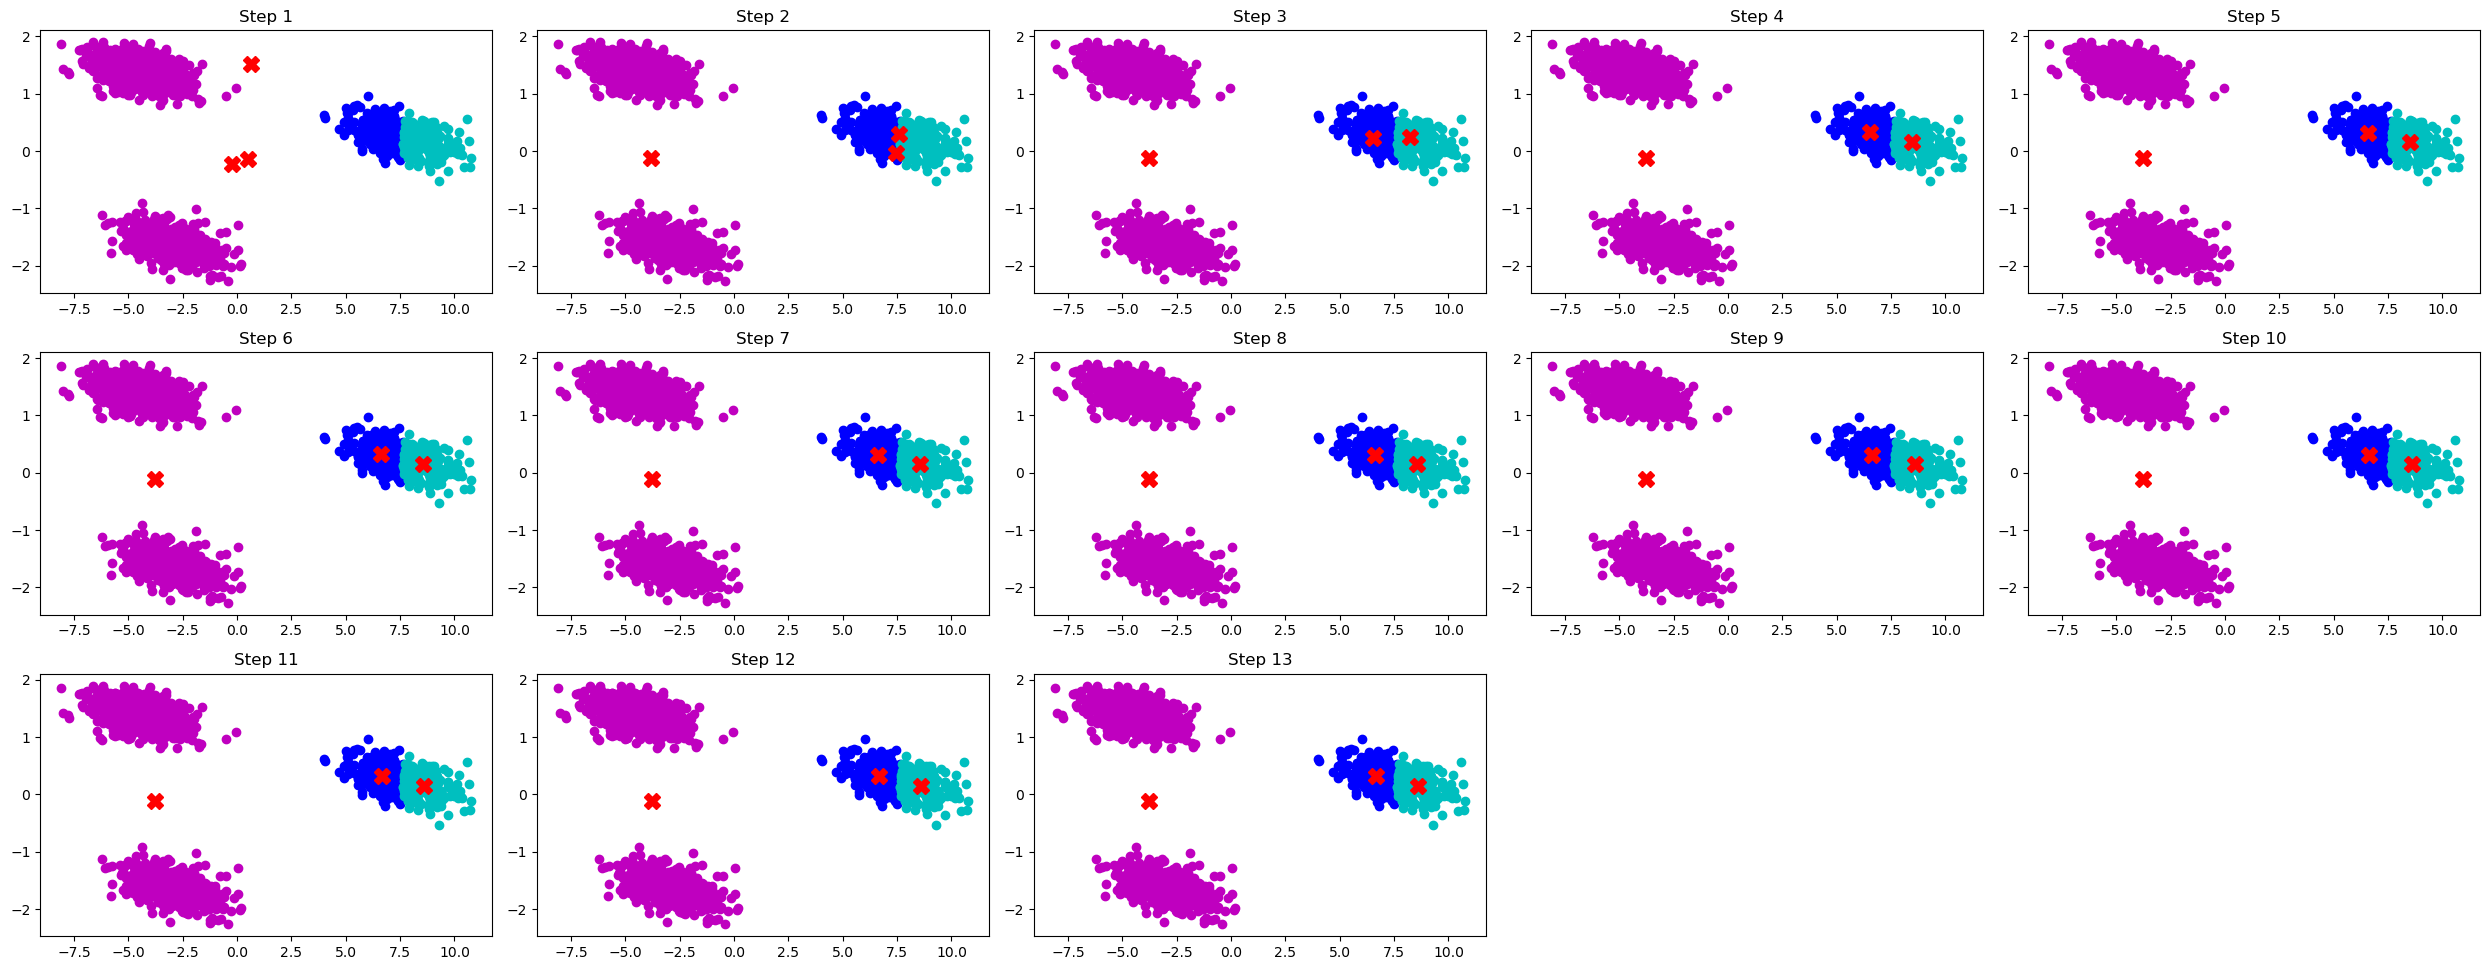

In [15]:
for data, _, title in datasets:
# Now, we will process each dataset with this function
    if title == 'Noisy Circles':
        clusters = 2
    elif title == 'Noisy Moons':
        clusters = 2
    elif title == 'Blobs':
        clusters = 3
    elif title == 'Anisotropic Blobs':
        clusters = 3
    else:
        break
    # Perform PCA or t-SNE; here we use PCA for dimensionality reduction
    reduced_data = reduce_dimensions(data, method='PCA', n_components=2)
    
    # Execute K-means clustering and record the changes in centroids
    labels, centroids_history = kmeans_with_centroids(reduced_data, n_clusters=clusters)
    
    # Visualize the clustering results and the changes in centroids
    plot_kmeans_results(reduced_data, labels, centroids_history)


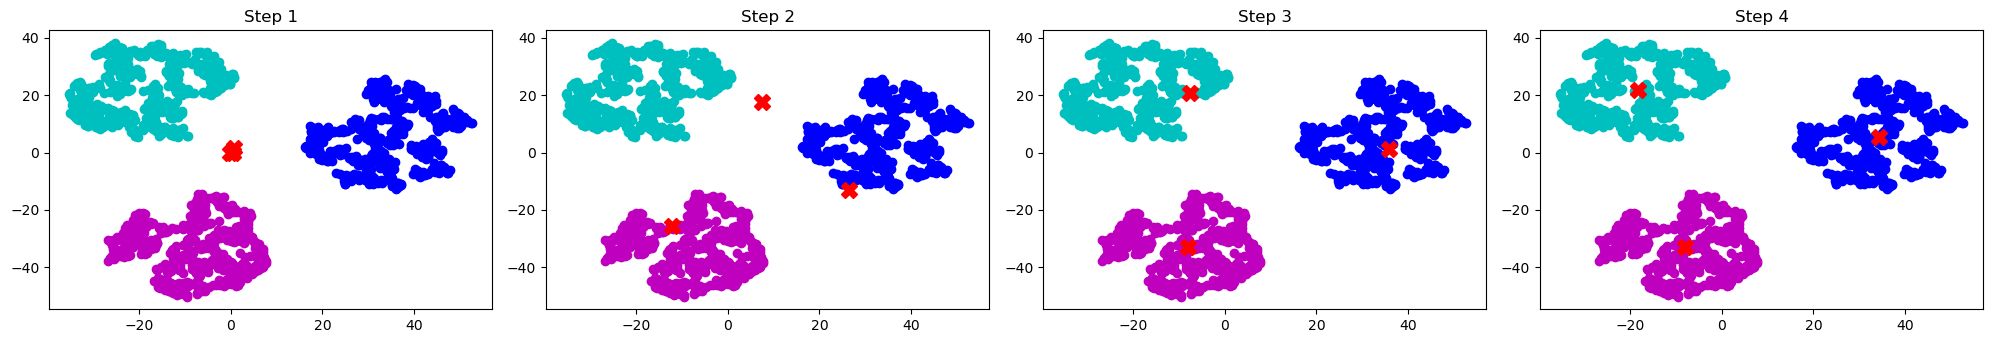

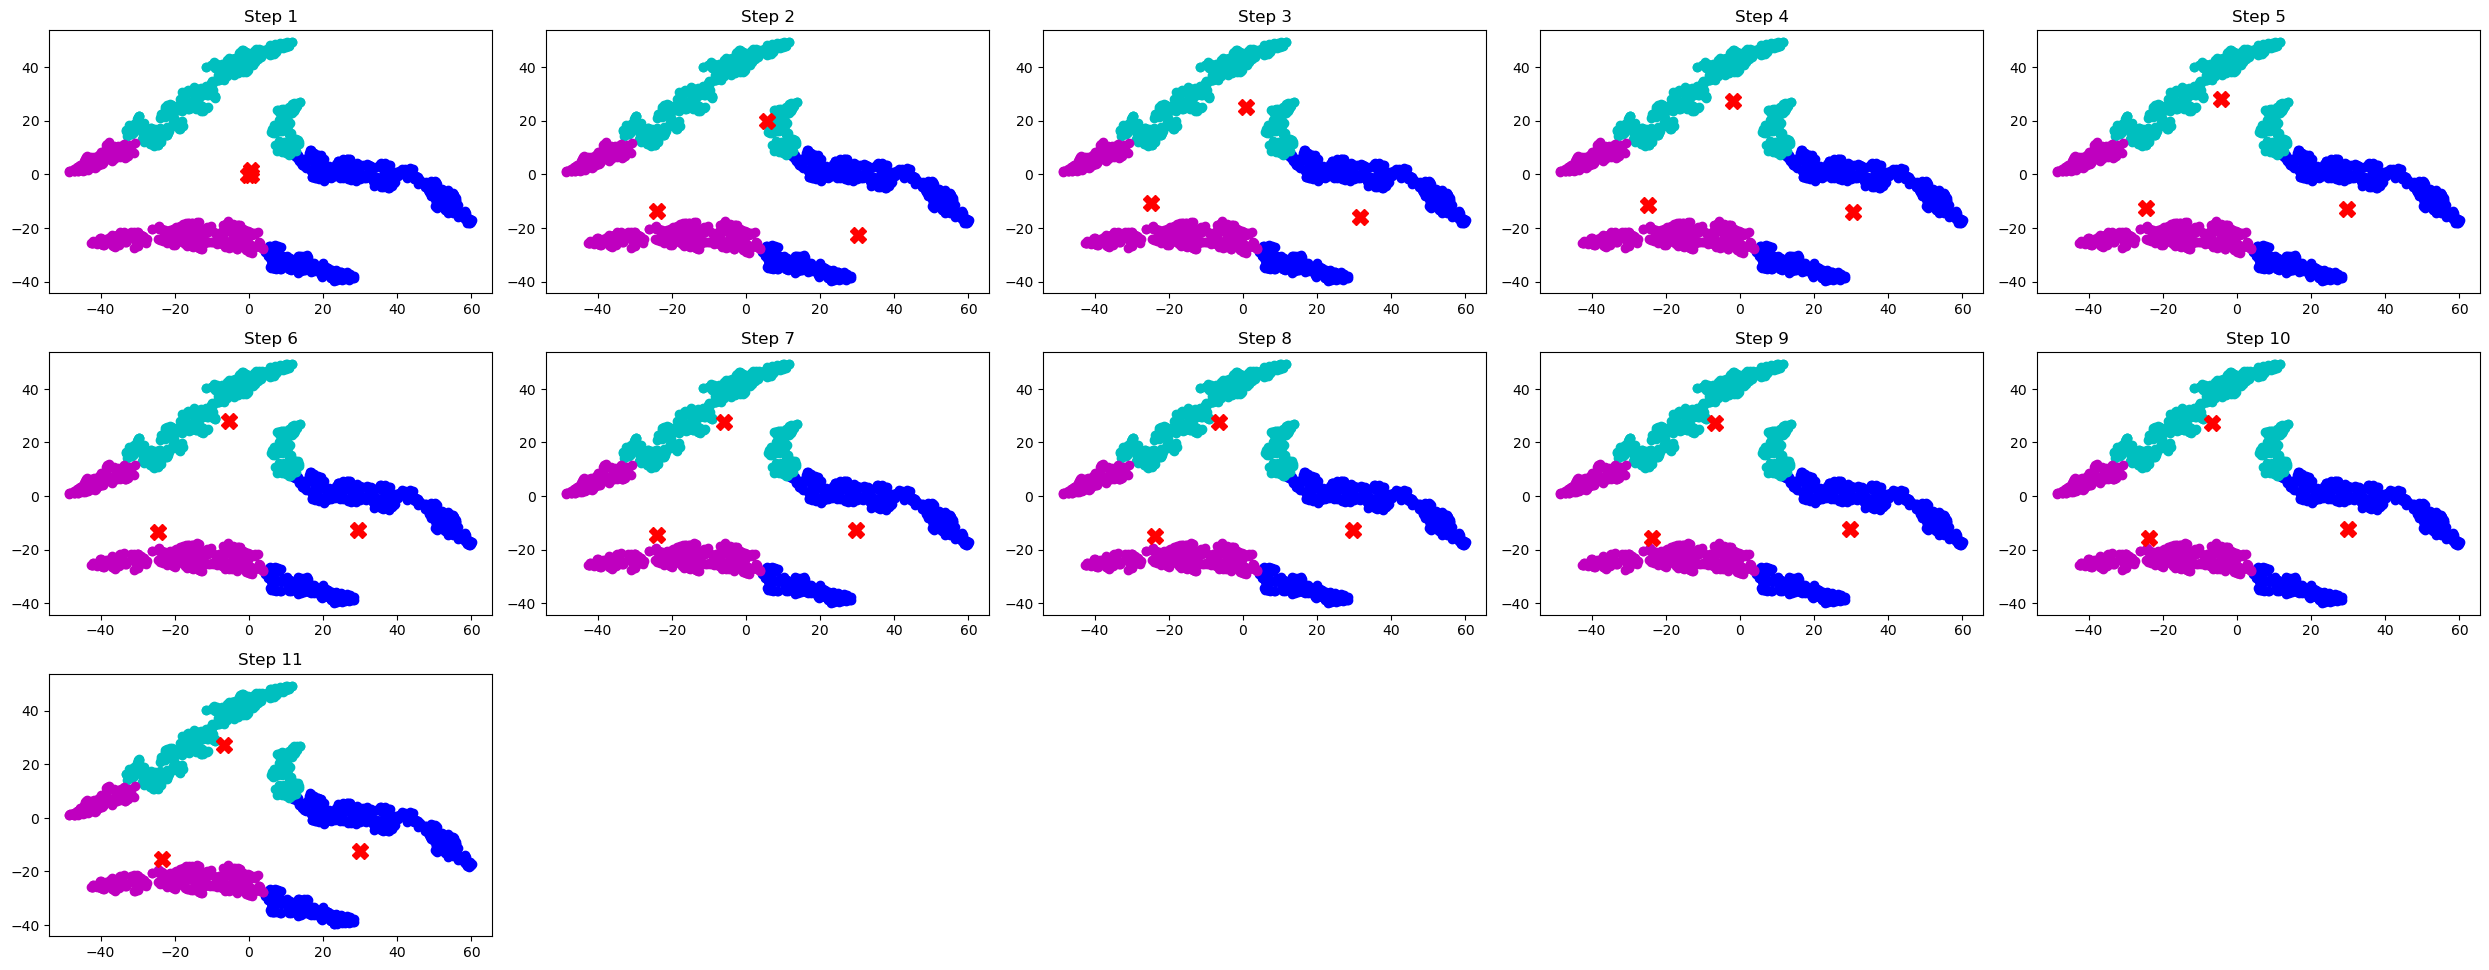

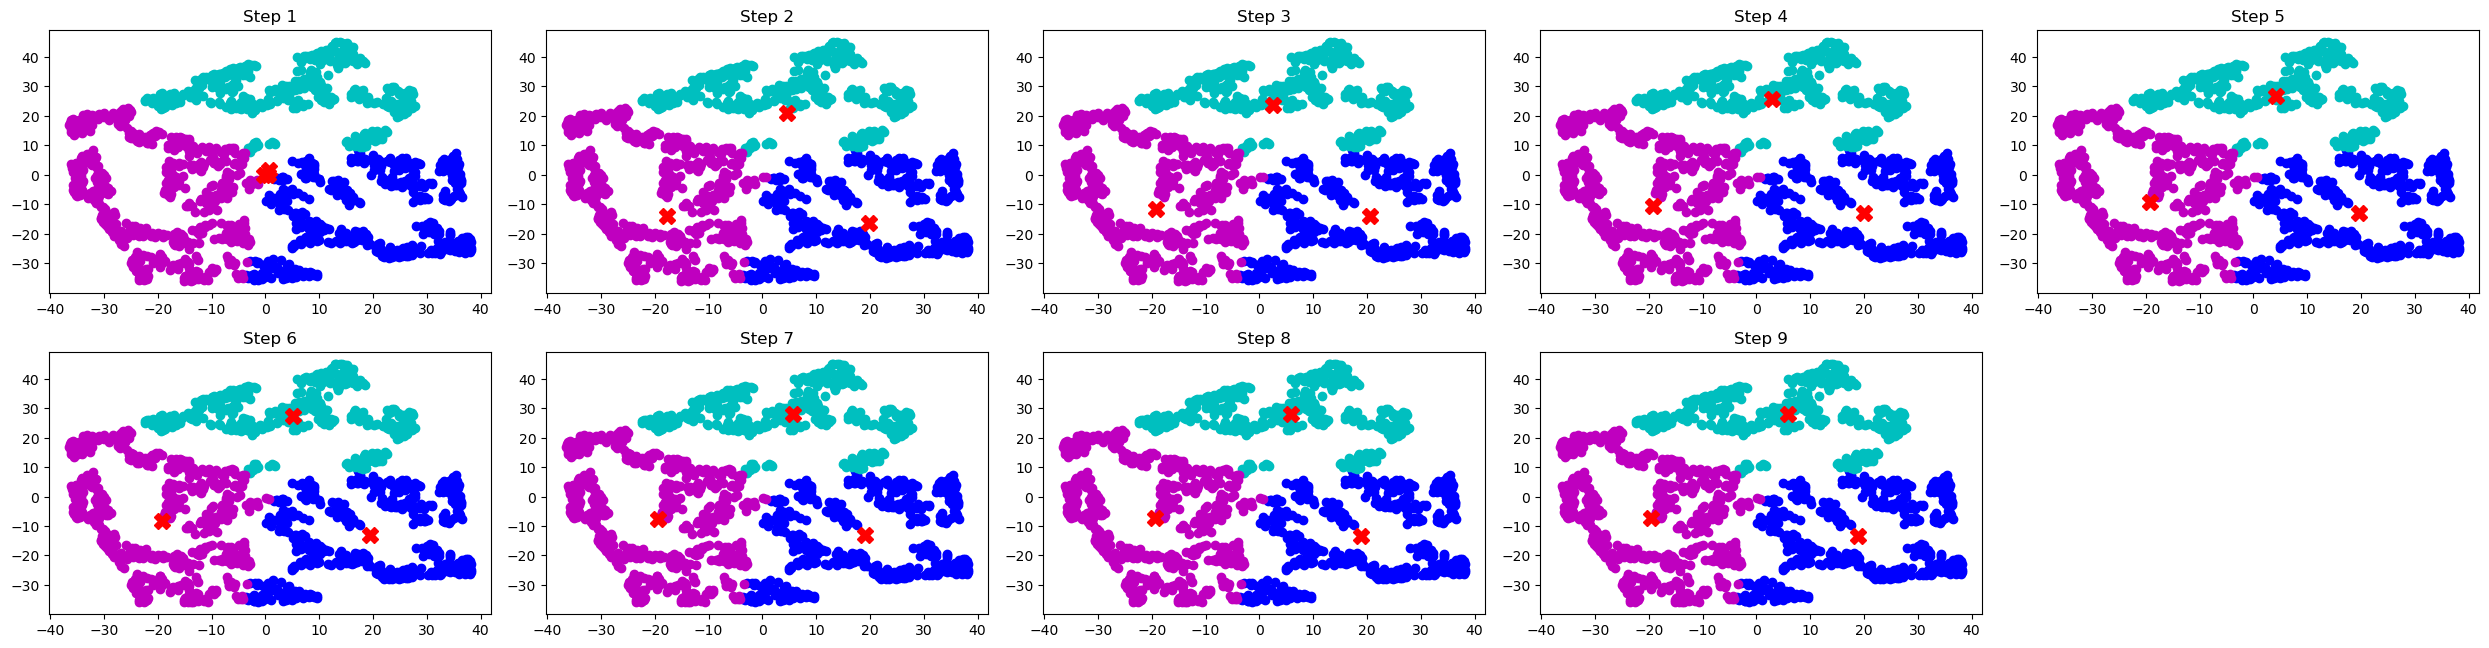

In [16]:
for data, _, title in datasets:
 # Now, we will process each dataset with this function
    if title == 'Noisy Circles':
        clusters = 2
        continue
    elif title == 'Noisy Moons':
        clusters = 2
        continue
    elif title == 'Blobs':
        clusters = 3
    elif title == 'Anisotropic Blobs':
        clusters = 3
    else:
        clusters = 3
    # Perform PCA or t-SNE; here we use t-SNE for dimensionality reduction
    reduced_data = reduce_dimensions(data, method='t-SNE', n_components=2)
    
    # Execute K-means clustering and record the changes in centroids
    labels, centroids_history = kmeans_with_centroids(reduced_data, n_clusters=clusters)
    
    # Visualize the clustering results and the changes in centroids
    plot_kmeans_results(reduced_data, labels, centroids_history)


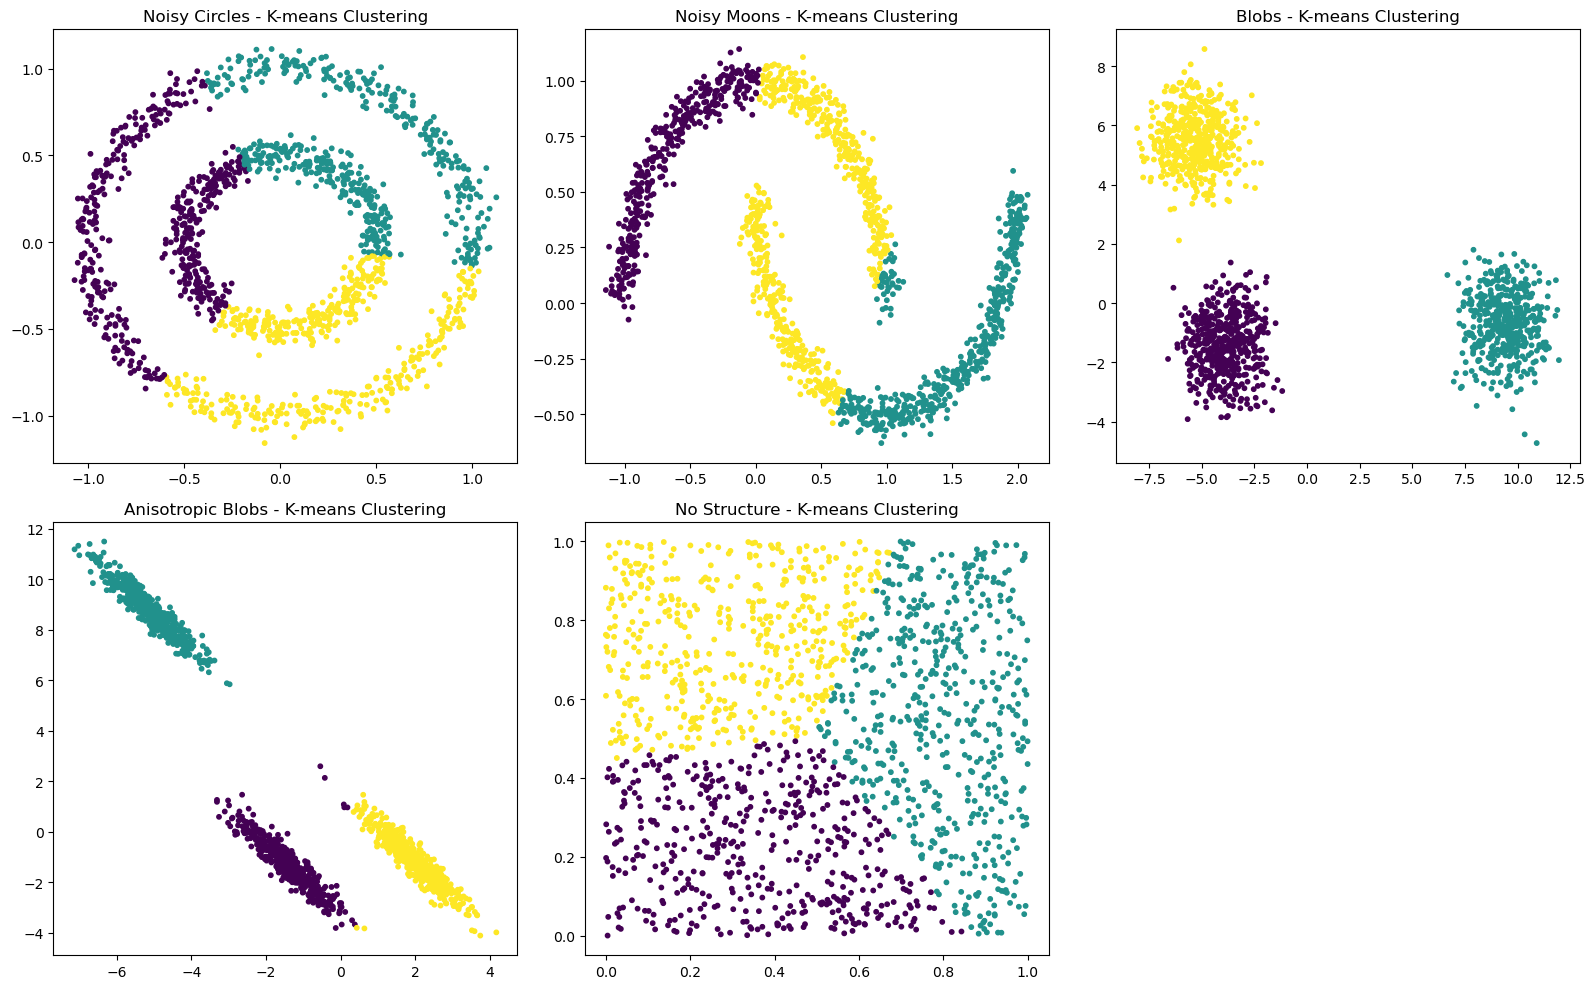

Silhouette to each dataset is: [0.3908, 0.4295, 0.7873, 0.7013, 0.3592]


In [30]:
# Set the environment variable OMP_NUM_THREADS to 1
os.environ['OMP_NUM_THREADS'] = '1'
# Disable warning messages
warnings.filterwarnings('ignore')

Silhouette_list = []
plt.figure(figsize=(16, 10))
for i, (data, _, title) in enumerate(datasets):
    if title == 'Noisy Circles':
        clusters = 2
    elif title == 'Noisy Moons':
        clusters = 2
    elif title == 'Blobs':
        clusters = 3
    elif title == 'Anisotropic Blobs':
        clusters = 3
    else:
        clusters = 3

    reduced_data = reduce_dimensions(data, method='PCA', n_components=2)
    plt.subplot(2, 3, i + 1)
    
    # Apply K-means to the datasets
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(data)

    # Compute Silhouette score to each dataset after procession
    Silhouette = metrics.silhouette_score(data, kmeans_labels)
    Silhouette_list.append(round(Silhouette,4))

    # Visualize each dataset after procession
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
    plt.title(title + " - K-means Clustering")
plt.tight_layout()
plt.show()
print(f'Silhouette to each dataset is: {Silhouette_list}')

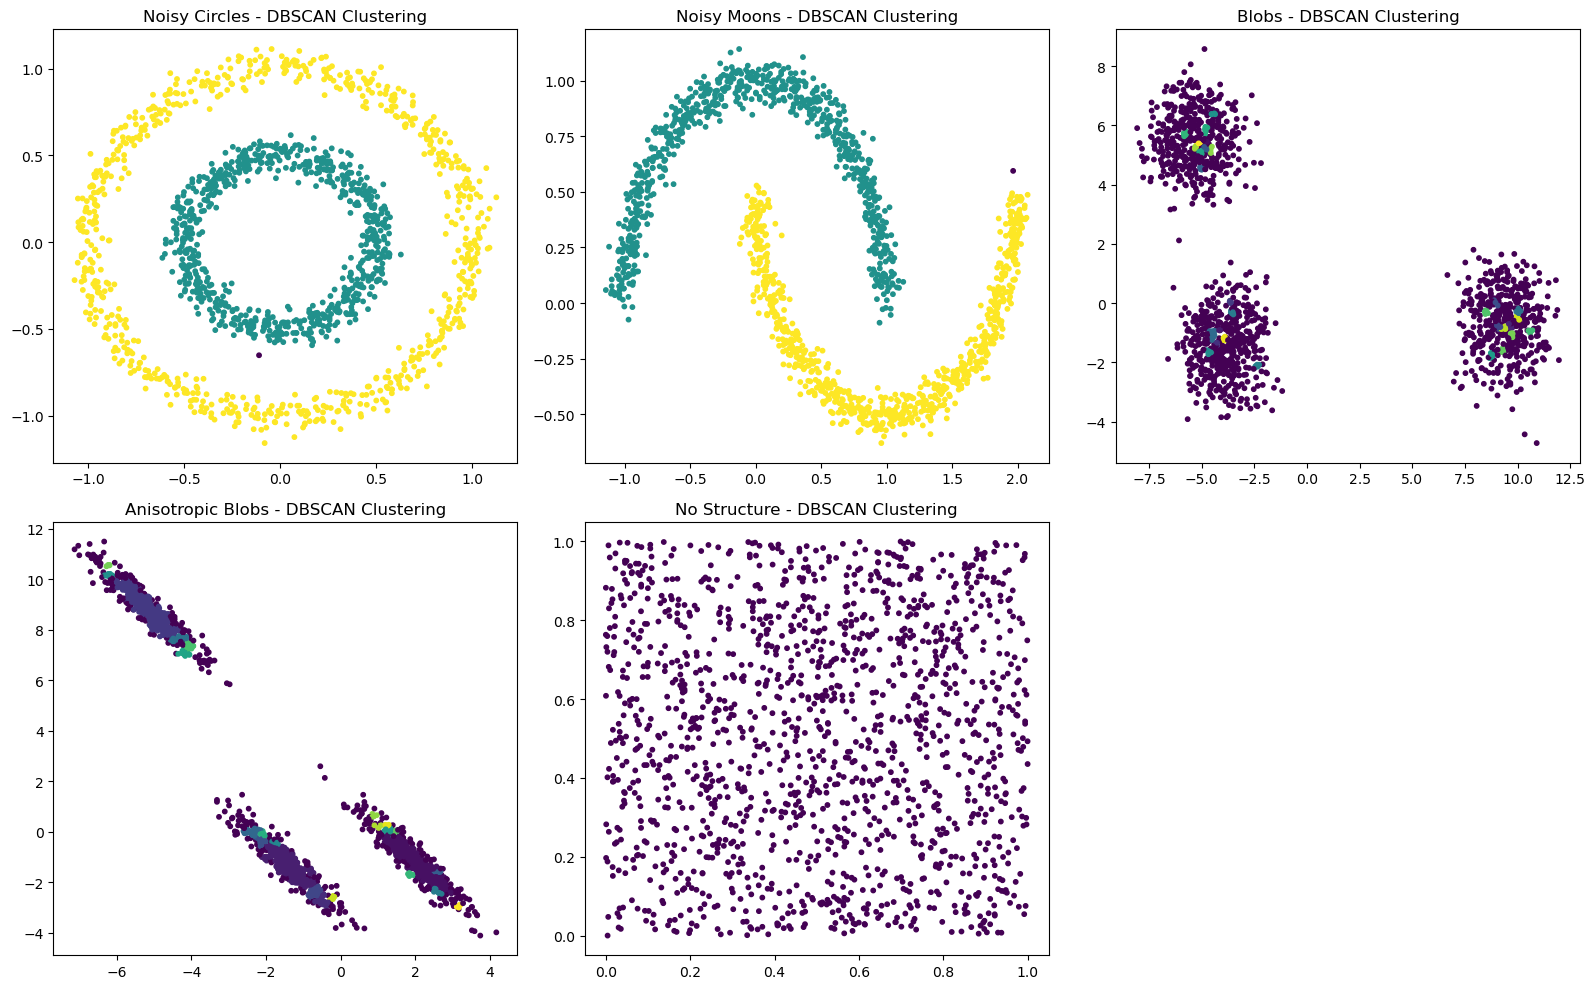

Silhouette to each dataset is: [-0.1294, 0.1767, -0.7037, -0.2074]


In [34]:
Silhouette_list = []
plt.figure(figsize=(16, 10))
for i, (data, _, title) in enumerate(datasets):
    if title == 'Noisy Circles':
        clusters = 2
    elif title == 'Noisy Moons':
        clusters = 2
    elif title == 'Blobs':
        clusters = 3
    elif title == 'Anisotropic Blobs':
        clusters = 3
    else:
        clusters = 3
    # Perform PCA or t-SNE; here we use PCA for dimensionality reduction
    reduced_data = reduce_dimensions(data, method='PCA', n_components=2)
    
    # Apply DBCcan to the datasets
    dbscan = DBSCAN(eps=eps)
    dbscan_labels = dbscan.fit_predict(data)

    # Because dataset 'No Structure' could not compute Silhouette score
    # we ignore it
    if title != 'No Structure':
        # Compute Silhouette score to each dataset after procession
        Silhouette = metrics.silhouette_score(data, dbscan_labels)
        Silhouette_list.append(round(Silhouette,4))
        
    # Visualize each dataset after procession
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='viridis', s=10)
    plt.title(title + " - DBSCAN Clustering")
plt.tight_layout()
plt.show()
print(f'Silhouette to each dataset is: {Silhouette_list}')

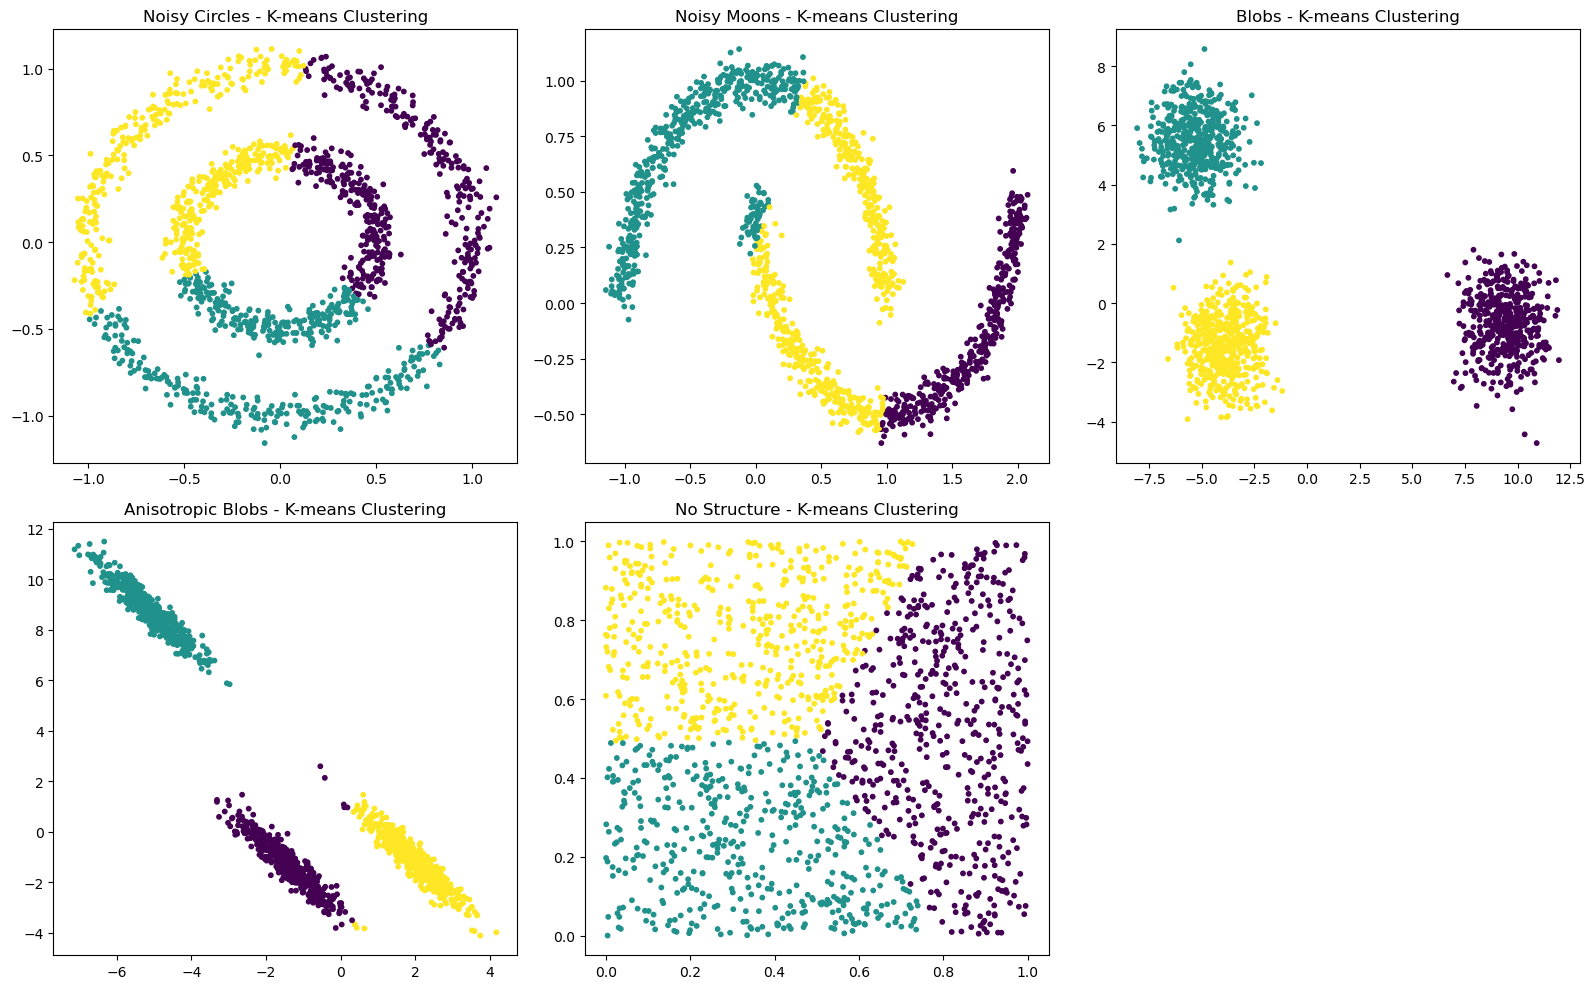

Silhouette to each dataset is: [0.3911, 0.4249, 0.7873, 0.7011, 0.3594]


In [33]:
# Set the environment variable OMP_NUM_THREADS to 1
os.environ['OMP_NUM_THREADS'] = '1'
# Disable warning messages
warnings.filterwarnings('ignore')

Silhouette_list = []
plt.figure(figsize=(16, 10))
for i, (data, _, title) in enumerate(datasets):
    if title == 'Noisy Circles':
        clusters = 2
    elif title == 'Noisy Moons':
        clusters = 2
    elif title == 'Blobs':
        clusters = 3
    elif title == 'Anisotropic Blobs':
        clusters = 3
    else:
        clusters = 3
    # Perform PCA or t-SNE; here we use PCA for dimensionality reduction
    reduced_data = reduce_dimensions(data, method='t-SNE', n_components=2)
    plt.subplot(2, 3, i + 1)
    
    # Apply K-means to the datasets
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(data)

    # Compute Silhouette score to each dataset
    Silhouette = metrics.silhouette_score(data, kmeans_labels)
    Silhouette_list.append(round(Silhouette,4))
    
    # Visualize each dataset after procession
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
    plt.title(title + " - K-means Clustering")
plt.tight_layout()
plt.show()
print(f'Silhouette to each dataset is: {Silhouette_list}')